In [26]:
# 主成分分析
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header = None,
    sep = ',',
)
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class_label']
# dropna(how = 'all') # 传入这个参数后将只丢弃全为缺失值的那些行 
df.dropna(how = 'all', inplace=True)

df.tail()

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],class_label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
X = df.ix[:,0:4].values
y = df.ix[:,4].values
# print(y)  一个List

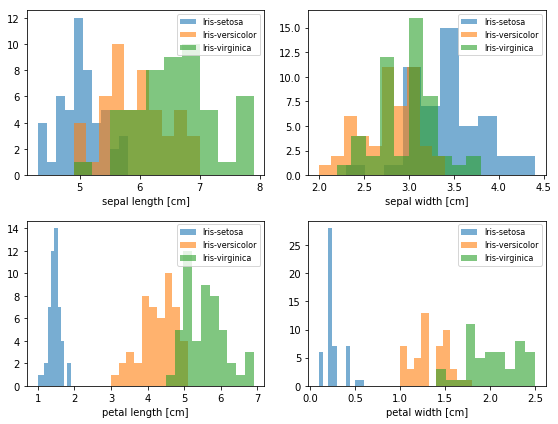

In [27]:
from matplotlib import pyplot as plt
import math

label_dict = {1: 'Iris-setosa', 
        2: 'Iris-versicolor',
        3: 'Iris-virginica'}
# 指定特征名
feature_dict = {i:label for i, label in zip(range(4), 
            ('sepal length [cm]', 
             'sepal width [cm]',
             'petal length [cm]',
             'petal width [cm]',))}
# print(feature_dict) 

plt.figure(figsize=(8, 6))
for cnt in range(4):   # 四个特征
  plt.subplot(2, 2, cnt+1)
  for lab in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']:  # 三个类别
    # 绘制直方图
    plt.hist(X[y==lab,cnt],
          label=lab,
          bins=10,
          alpha=0.6, 
             )        
  plt.xlabel(feature_dict[cnt])
  plt.legend(loc='upper right', fancybox=True, fontsize=8)

# 不同类别的花在同一个特征上的差异
plt.tight_layout()
plt.show()


In [31]:
# 对数据进行标准化
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
# print(X_std)
print(X_std.mean(axis=0))
print(X_std.std(axis=0))

[-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
[1. 1. 1. 1.]


In [33]:
import numpy as np

# 计算协方差矩阵
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [34]:
print('Numpy covariance matrix:\n%s' %np.cov(X_std.T))

Numpy covariance matrix:
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [37]:
cov_mat = np.cov(X_std.T)
# 使用np的线性代数工具包计算特征值和特征向量
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Eigen_values: \n%s" %eig_vals)
print("\nEigen_vecs: \n%s" %eig_vecs)

Eigen_values: 
[2.93035378 0.92740362 0.14834223 0.02074601]

Eigen_vecs: 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [39]:
# 将特征值和特征向量进行组队
# make a list of (eig_vals, eig_vecs) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i]) for i in range(len(eig_vals))]
print(eig_pairs)

print("---------------------")
# 按照特征值进行高到底排序
eig_pairs.sort(key=lambda x:x[0], reverse=True)

print('Eigen_values in descending order:')
for i in eig_pairs:
  print(i[0])

[(2.930353775589317, array([ 0.52237162, -0.37231836, -0.72101681,  0.26199559])), (0.9274036215173419, array([-0.26335492, -0.92555649,  0.24203288, -0.12413481])), (0.14834222648163944, array([ 0.58125401, -0.02109478,  0.14089226, -0.80115427])), (0.02074601399559593, array([ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]))]
---------------------
Eigen_values in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [40]:
# 计算特征重要度占比
tot = sum(eig_vals)
var_exp = [(i/ tot)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)  # 各个特征占比

cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)  # 前几个特征占比


[72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]
[ 72.77045209  95.80097536  99.48480732 100.        ]


In [42]:
a = np.array([1,2,3,4])
print(a)
print('--------test---------')
print(np.cumsum(a))

[1 2 3 4]
--------test---------
[ 1  3  6 10]


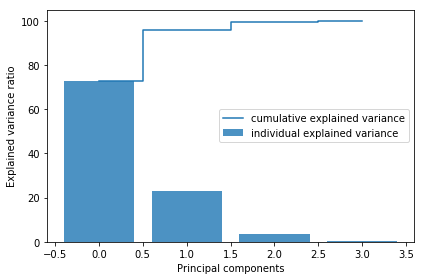

In [45]:
plt.figure(figsize=(6,4))
# 绘制柱形图 
plt.bar(range(4), var_exp, alpha=0.8, align='center',
        label='individual explained variance')
# 绘制步阶图 
plt.step(range(4), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio') # 累计方差比
plt.xlabel('Principal components') # 主成分
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [46]:
# 取前两个主成分对应的特征向量
# np.hstack()函数的作用将两个维度相同的numpy数组横向拼接
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
            eig_pairs[1][1].reshape(4,1)))
print(matrix_w)

[[ 0.52237162 -0.26335492]
 [-0.37231836 -0.92555649]
 [-0.72101681  0.24203288]
 [ 0.26199559 -0.12413481]]


In [0]:
# 将原始矩阵和特征向量相乘
Y = X_std.dot(matrix_w)  # （150*4）*（4*2）=(150*2)维
print(Y)


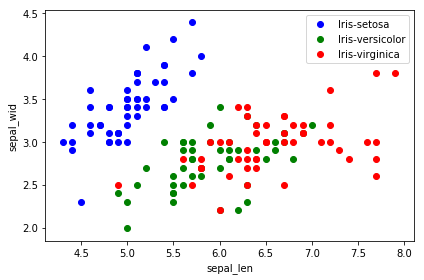

In [51]:
# 画出降维前，前两个特征的图形
plt.figure(figsize=(6,4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
             ('blue','green','red')):
  # print(lab, col) col对应颜色
# Iris-setosa blue
# Iris-versicolor green
# Iris-virginica red
  plt.scatter(X[y==lab, 0], X[y==lab, 1], label=lab, c=col)

plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

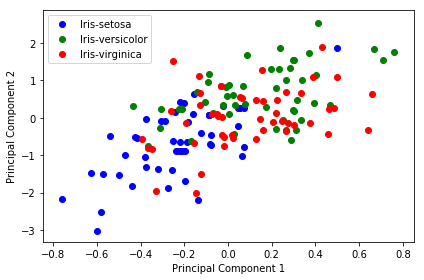

In [54]:
# 画出降维后，选取的两个主成分的图形
plt.figure(figsize=(6,4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
             ('blue','green','red')):
  plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()